In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Загрузка данных

In [13]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data_ford_price.xlsx') 

In [6]:
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [4]:
y = data['price']
X = data.drop(columns='price')

# Предобработка

In [5]:
lr = LinearRegression()
lr.fit(X,y)

ValueError: could not convert string to float: 'clean'

_______________________
Сторонний пример

In [7]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
lb.fit(education)
 
print('категории:', lb.classes_) 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

___________________________________

<Axes: >

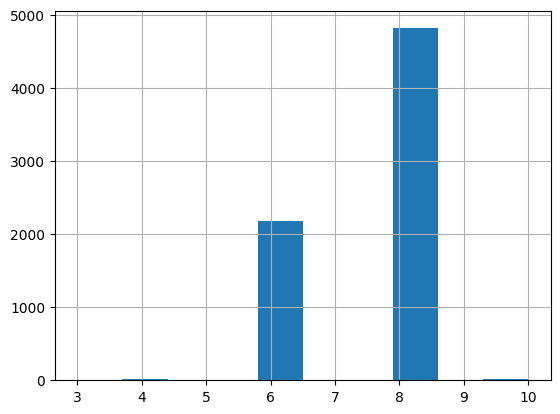

In [8]:
data['cylinders'].hist()

<Axes: >

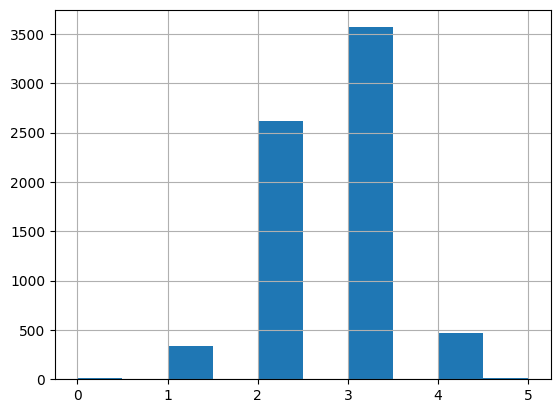

In [10]:
data['condition'].hist()

In [11]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


In [12]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray() 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


Задание 3.7

Какая форма (количество строк и столбцов) будет у нашего датасета о стоимости автомобилей после кодировки номинальных признаков однократным методом?

Для ответа на поставленный вопрос выполните следующие шаги:

Загрузите данные в локальную директорию с помощью команды !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx.
Загрузите данные в память ноутбука с помощью функции read_excel() библиотеки pandas.
Закодируйте столбцы из списка columns_to_change.
Преобразуйте полученный массив закодированных данных в формат DataFrame, явно указав имена колонок.
Подсказка 1
В качестве индекса используйте data.index, в качестве колонок — column_names.

Подсказка 2
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)
Соедините новую таблицу с исходной.
Подсказка 1
Используйте метод pd.concat().

Подсказка 2
Для того чтобы соединить таблицы по столбцам, необходимо явно указать axis = 1.

Подсказка 3
data_new = pd.concat([data, data_onehot], axis=1)
Удалите закодированные столбцы columns_to_change из полученной таблицы.
Подсказка 1
Для удаления столбцов воспользуйтесь методом drop().

Подсказка 2
data_new = data_new.drop(columns=columns_to_change)
Выведите на экран форму полученной таблицы.
Подсказка 1
Воспользуйтесь методом shape().

Ответ запишите в круглых скобках без пробелов. Пример ввода ответа: (10,10).

In [14]:
data_onehot = pd.DataFrame(data, index=data.index, columns=column_names)
data_onehot

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data_new = pd.concat([data, data_onehot], axis=1)

In [16]:
data_new = data_new.drop(columns=columns_to_change)

In [18]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   7017 non-null   int64  
 1   year                    7017 non-null   int64  
 2   condition               7017 non-null   int64  
 3   odometer                7017 non-null   int64  
 4   lat                     7017 non-null   float64
 5   long                    7017 non-null   float64
 6   weather                 6837 non-null   float64
 7   cylinders_3             0 non-null      float64
 8   cylinders_4             0 non-null      float64
 9   cylinders_5             0 non-null      float64
 10  cylinders_6             0 non-null      float64
 11  cylinders_8             0 non-null      float64
 12  cylinders_10            0 non-null      float64
 13  title_status_clean      0 non-null      float64
 14  title_status_lien       0 non-null      

In [19]:
print('shape of data_new :', data_new.shape)

shape of data_new : (7017, 30)


In [22]:
data_new.shape

(7017, 30)